In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
adult = pd.read_csv('adult_subcategory_classification.csv')
adult.head()

,website_url,cleaned_website_text,Category
0,http://www.ephonecards.com.au/,e phone cards e phone card cheap way talk long...,Non-Teen
1,http://www.teasingeroticstories.com,tease erotic stories erotic story plain fuck s...,Non-Teen
2,http://xxxfuckstories.com/,xxx fuck story free erotic story xxx fuck stor...,Non-Teen
3,http://www.sexstories-wives.com/,hot wife milf stories slut wife sex story slut...,Non-Teen
4,http://www.1stsexstories.com,free sex stories erotic stories erotic fiction...,Non-Teen


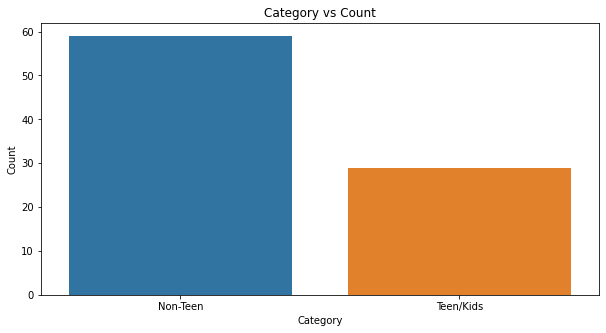

In [4]:
#Putting values into graph
plt.figure(figsize=(10,5))
plt.title("Category vs Count")
adult_category_count = pd.DataFrame(adult["Category"].value_counts())
sns.barplot(x=adult_category_count.index, y=adult_category_count["Category"])
plt.ylabel("Count")
plt.xlabel("Category")
plt.show()

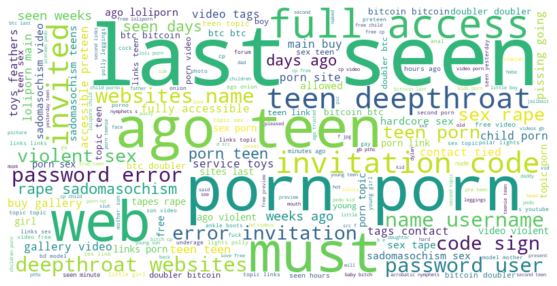

In [5]:
from wordcloud import WordCloud

category_name = "Teen/Kids"
category_data = adult[adult["Category"]==category_name]['cleaned_website_text']
category_text = ' '.join(category_data)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Cleaning the text

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')
import string

lem = WordNetLemmatizer()

def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return 'a'
    elif nltk_tag.startswith('V'):
        return 'v'
    elif nltk_tag.startswith('R'):
        return 'r'
    else:
        return 'n'
    
#Define function to lemmatize each word with its POS tag
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text)
    pos_tagged_text = [(word, pos_tagger(pos_tag)) for word, pos_tag in pos_tagged_text]
    return [lem.lemmatize(word, pos_tag) for word, pos_tag in pos_tagged_text]

In [7]:
from nltk import FreqDist

adult["cleaned_website_text"] = adult["cleaned_website_text"].apply(lambda x: x.lower())
adult["cleaned_website_text"] = adult["cleaned_website_text"].apply(lambda x: re.sub(r'[^\w\s]','',x))
adult["cleaned_website_text"] = adult["cleaned_website_text"].apply(lambda x: re.sub(r'\d+','',x))
adult["cleaned_website_text"] = adult["cleaned_website_text"].apply(lambda x: re.sub(r'\s+',' ',x))
adult["cleaned_website_text"] = adult["cleaned_website_text"].apply(lambda x: word_tokenize(x))
adult["cleaned_website_text"] = adult["cleaned_website_text"].apply(lambda x: [word for word in x if word not in stop_words])
adult["cleaned_website_text"] = adult["cleaned_website_text"].apply(lambda x: [word for word in x if len(word) > 2])
adult["cleaned_website_text"] = adult["cleaned_website_text"].apply(lambda x: lemmatize_words(x))
adult["cleaned_website_text"] = adult["cleaned_website_text"].apply(lambda x: ' '.join(x))

# # Filter out infrequent words
# tokens = [word_tokenize(text) for text in adult["cleaned_website_text"]]
# word_freq = FreqDist([word for token in tokens for word in token])
# threshold_freq = 10
# adult["cleaned_website_text"] = adult["cleaned_website_text"].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word_freq[word] > threshold_freq]))

### Feature Extraction: Label Encoding

In [8]:
le = LabelEncoder()
adult["Category"] = le.fit_transform(adult["Category"])
adult.tail()

,website_url,cleaned_website_text,Category
83,http://qsfvxmx5b2qjcwlazipbnmkkm7nbar4qjgb7ltl...,wan fuck teen girl teen sex teen rape choose g...,1
84,http://36deeqadwptajwumq7375px4osde5yupz7flhc7...,teen boy free video golden club forum onion po...,1
85,http://v5pjd77uzlm72vyh7ial5ih6sa7j5ndvhhlpnld...,child teen sex magazine onion big onion pedo t...,1
86,http://amateddr6lvn3z3vmdrnurhyznbwavz62yubj27...,amateur teen porn amateur teen porn home categ...,1
87,http://kindeana3njoc4huumj2kpxd7dkewjtemtfi6si...,kindergarten darknet teen sex kindergarten dar...,1


In [9]:
#splitting dataset
X_train,X_test,y_train,y_test = train_test_split(adult["cleaned_website_text"], adult["Category"], test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((70,), (18,), (70,), (18,))

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word',smooth_idf=True,max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [11]:
feature_names = tfidf.get_feature_names_out()

#get IDF score
idf_score = tfidf.idf_

# Print feature names and IDF scores
for feature, score in zip(feature_names, idf_score):
    print(feature, score)

abba 4.56953269648137
abigail 4.1640675883732055
ability 3.4709204078132605
able 3.316769727986002
abs 4.1640675883732055
absolutely 3.316769727986002
abu 4.56953269648137
abuse 2.9600947840472696
abused 3.8763855159214247
accent 3.8763855159214247
accept 2.6977305195797787
access 1.9304753668661114
accessible 3.653241964607215
accessory 4.1640675883732055
accidental 3.8763855159214247
accord 3.8763855159214247
account 2.1716374236829994
ache 3.653241964607215
achieve 4.1640675883732055
acquire 3.8763855159214247
across 3.8763855159214247
act 3.316769727986002
action 2.490091154801534
active 3.316769727986002
activity 2.6236225474260566
actual 4.1640675883732055
actually 3.316769727986002
ad 3.653241964607215
adam 4.56953269648137
add 2.490091154801534
adderall 3.653241964607215
addition 3.316769727986002
additional 4.1640675883732055
additionally 4.1640675883732055
address 2.864784604242945
ado 4.1640675883732055
adolescent 3.4709204078132605
adress 3.8763855159214247
adriana 3.876385

### Training Model Pipeline

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have your training data (X_train) and corresponding labels (y_train)

# Define the models and their respective hyperparameters to try during grid search
models = {
    'MNB': {
        'model': MultinomialNB(),
        'params': {
            'mnb__alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'svm__C': [1, 10],
            'svm__kernel': ['linear', 'rbf']
        }
    },
}

# Perform grid search and cross-validation for each model
for model_name, model_data in models.items():
    print("Evaluating:", model_name)
    
    # Create a pipeline with a TF-IDF vectorizer and the current model
    pipeline = Pipeline([
        ("feature_selection", SelectKBest(score_func=chi2)),
        (model_name.lower(), model_data['model'])
    ])
    
    # Define the hyperparameters for the current model
    parameters = {
        'feature_selection__k':[1000, 2000, 3000, 4000, 5000],
        **model_data['params']
    }
    
    # Perform grid search with 5-fold cross-validation
    grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy')
    grid_search.fit(X_train_tfidf, y_train)
    
    # Get the best model and its corresponding hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test_tfidf)
    
    # Calculate and print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print("Best parameters:", best_params)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 score:", f1)
    print("----------------------------------")

Evaluating: MNB
Best parameters: {'feature_selection__k': 1000, 'mnb__alpha': 0.1}
Accuracy: 0.8888888888888888
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1 score: 0.8888888888888888
----------------------------------
Evaluating: SVM
Best parameters: {'feature_selection__k': 1000, 'svm__C': 1, 'svm__kernel': 'linear'}
Accuracy: 0.9444444444444444
Precision: 0.9500000000000001
Recall: 0.9444444444444444
F1 score: 0.9442724458204333
----------------------------------


In [17]:
#for Multinomial Naive Bayes
from sklearn.feature_selection import chi2
chi2_selector = SelectKBest(score_func=chi2, k=1000)

X_train_selected = chi2_selector.fit_transform(X_train_tfidf, y_train)
X_test_selected = chi2_selector.transform(X_test_tfidf)


In [18]:
model = SVC(C=1, kernel='linear')
model.fit(X_train_selected, y_train)

SVC(C=1, kernel='linear')

In [19]:
import sklearn.metrics as sm

y_pred = model.predict(X_test_selected)

print(f'The accuracy of train model is {sm.accuracy_score(y_train,model.predict(X_train_selected))}')
print(f'The accuracy of test model is {sm.accuracy_score(y_test,y_pred)}')

The accuracy of train model is 1.0
The accuracy of test model is 0.9444444444444444


In [20]:
from bs4 import BeautifulSoup
import bs4 as bs4
from urllib.parse import urlparse
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import os


class ScrapTool:   
    def visit_url(self,website_url):
        '''
        Visit URL. Download the Content. Initialize the beautifulsoup object. Call parsing methods. Return Series object.
        '''
        #Set up Selenium webdriver
        PATH = 'C:/Users/User01/Downloads/chromedriver_win32/chromedriver.exe'

        # Set the Chrome webdriver options
        chrome_options = Options()
        chrome_options.add_argument("--headless")
        # Initialize the Chrome webdriver and pass the Chrome options
        service = Service(PATH)
        driver = webdriver.Chrome(service = service, options = chrome_options)

        #Load website
        driver.get(website_url)
        
        # Check if the cookie consent button is present
        cookie_button = None
        try:
            cookie_button = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "cookie-consent-button")))
        except:
            pass

        # Handle cookies if the button is present
        if cookie_button:
            cookie_button.click()

        # Extract HTML content
        html_content = driver.page_source
        driver.quit()

        soup = BeautifulSoup(html_content,'lxml')
        result = {
            "website_url": website_url,
            "website_name": self.get_website_name(website_url),
            "website_text": self.get_html_title_tag(soup)+self.get_html_meta_tags(soup)+self.get_html_heading_tags(soup)+
                                    self.get_text_content(soup)
        }
        
        #Convert to Series object and return
        return pd.Series(result)
    
    def get_website_name(self,website_url):
        '''
        Example: returns "google" from "www.google.com"
        '''
        return "".join(urlparse(website_url).netloc.split(".")[-2])
    
    def get_html_title_tag(self,soup):
        '''Return the text content of <title> tag from a webpage'''
        return '. '.join(soup.title.contents)
    
    def get_html_meta_tags(self,soup):
        '''Returns the text content of <meta> tags related to keywords and description from a webpage'''
        tags = soup.find_all(lambda tag: (tag.name=="meta") & (tag.has_attr('name') & (tag.has_attr('content'))))
        content = [str(tag["content"]) for tag in tags if tag["name"] in ['keywords','description']]
        return ' '.join(content)
    
    def get_html_heading_tags(self,soup):
        '''returns the text content of heading tags. The assumption is that headings might contain relatively important text.'''
        tags = soup.find_all(["h1","h2","h3","h4","h5","h6"])
        content = [" ".join(tag.stripped_strings) for tag in tags]
        return ' '.join(content)
    
    def get_text_content(self,soup):
        '''returns the text content of the whole page with some exception to tags. See tags_to_ignore.'''
        tags_to_ignore = ['style', 'script', 'head', 'title', 'meta', '[document]',"h1","h2","h3","h4","h5","h6","noscript"]
        tags = soup.find_all(text=True)
        result = []
        for tag in tags:
            stripped_tag = tag.strip()
            if tag.parent.name not in tags_to_ignore\
                and isinstance(tag, bs4.element.Comment)==False\
                and not stripped_tag.isnumeric()\
                and len(stripped_tag)>0:
                result.append(stripped_tag)
        return ' '.join(result)

In [21]:
def cleaning(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r'\d+','',text)
    text = re.sub(r'\s+',' ',text)
    text = word_tokenize(text)
    text = [word for word in text if word not in stop_words]
    text = [word for word in text if len(word)>3]
    text = lemmatize_words(text)
    text = ' '.join(text)
    vector = tfidf.transform([text])
    vector = chi2_selector.transform(vector)
    vector = vector.toarray()
    
    return vector

def website_prediction(website,model):
    scrapTool = ScrapTool()
    try:
        web = dict(scrapTool.visit_url(website))
        text = cleaning(web['website_text'])
        prediction = model.predict(text)
        print(f'The website is under the category of {le.inverse_transform(prediction)[0]}')
    except Exception as e:
        print(e)
        print("Connection Timeout")

              precision    recall  f1-score   support

    Non-Teen       1.00      0.90      0.95        10
   Teen/Kids       0.89      1.00      0.94         8

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



<AxesSubplot:>

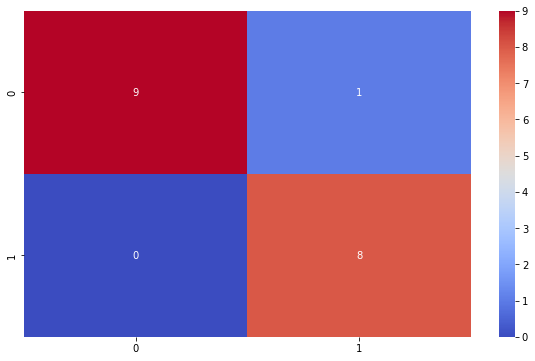

In [22]:
plt.figure(figsize=(10,6))
predictions = model.predict(X_test_selected)
print(classification_report(le.inverse_transform(predictions),le.inverse_transform(y_test)))
sns.heatmap(confusion_matrix(predictions,y_test),cmap='coolwarm',annot=True)

In [27]:
pd.set_option('display.max_rows', None)
predictions = model.predict(X_test_selected)
results = pd.DataFrame({'Cleaned Text':X_test,'Actual':y_test,'Predicted':predictions})
for i in adult.loc[results[results['Actual']!=results['Predicted']].index]['website_url']:
    print(i)

http://exchayfmcj2qk6njyrs4dxutzrreyafky67zhs6h27m7pppz7hk2dmad.onion/content/86544t32gff2d3eg241gh1gh1.php


In [28]:
website_prediction("https://www.brazzers.com/",model)

The website is under the category of Non-Teen


In [30]:
import pickle

filename = './model/AdultSubCat_SVM.sav'
vectorizer = './model/vectorizer.pkl'
selector = './model/selector.pkl'
pickle.dump(model, open(filename, 'wb'))
pickle.dump(tfidf, open(vectorizer, 'wb'))
pickle.dump(chi2_selector, open(selector, 'wb'))

#loading the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_selected, y_test)
print(result)

0.9444444444444444
